In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

df = pd.read_excel("dados_matriculas.xlsx")

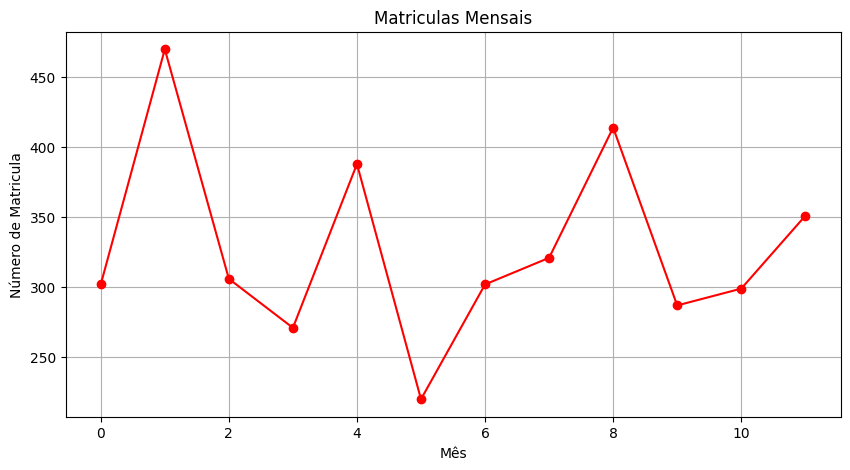

In [2]:
# Grafico de matriculas mensais
plt.figure(figsize=(10,5))

# .plot realiza a plotagem dos dados de df
df['Matrículas'].plot(marker='o', linestyle='-', color='red')

# Titulo 
plt.title('Matriculas Mensais')

# Pontos (X,Y)
plt.xlabel('Mês')
plt.ylabel('Número de Matricula')

# Linhas de Grade
plt.grid(True)

# Mostrar o gráficos
plt.show()

In [3]:
# Identificar o mês com maior número de matriculas
maior_matricula = df['Matrículas'].max()
indice_maior_matricula = df['Matrículas'].idxmax()

print(maior_matricula)
print(indice_maior_matricula)

470
1


In [4]:
# Menor número de matriculas
menor_matricula = df['Matrículas'].min()
indice_menor_matricula = df['Matrículas'].idxmin()

print(menor_matricula)
print(indice_menor_matricula)

220
5


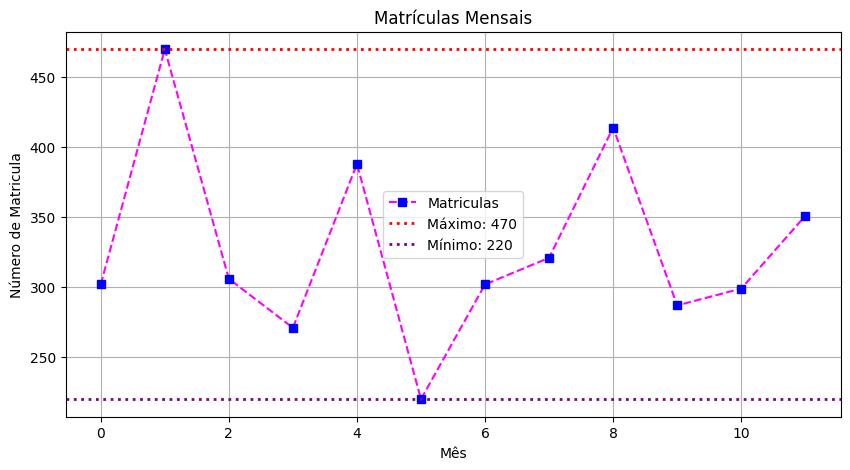

In [5]:
plt.figure(figsize=(10,5))
df['Matrículas'].plot(marker='s', linestyle='--', color='magenta', label='Matriculas', mfc='blue', mec='blue')

# Informações de destaque
 # Traço que delimita o maior e menor valor - eixo y
plt.axhline(y=maior_matricula, 
            color='red', 
            linestyle=':', 
            linewidth=2, 
            label=f"Máximo: {maior_matricula}")

plt.axhline(y=menor_matricula,
            color='purple',
            linestyle=':',
            linewidth=2,
            label=f"Mínimo: {menor_matricula}")

plt.title("Matrículas Mensais")
plt.xlabel('Mês')
plt.ylabel('Número de Matricula')

# Legenda
plt.legend()

plt.grid(True)
plt.show()

In [6]:
# Calculo médio de matriculas mensais
media_matricula = df['Matrículas'].mean()
print(media_matricula)

327.5833333333333


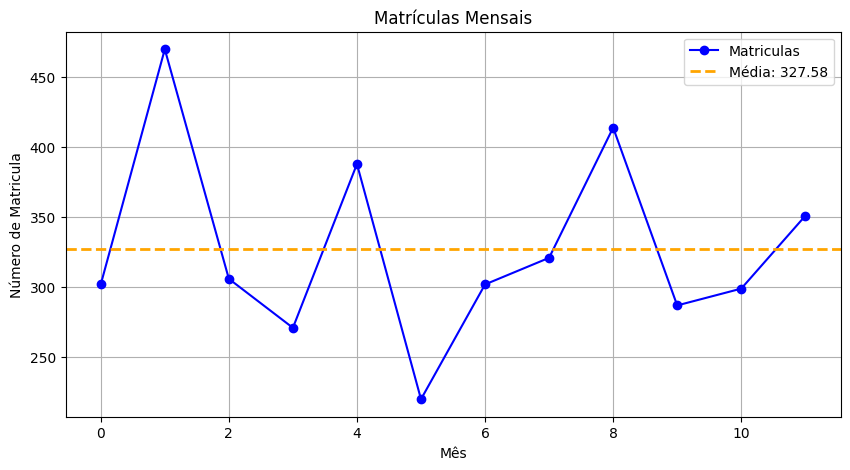

In [7]:
# Plotar o gráfico das matriculas mensais e destacar a media
plt.figure(figsize=(10, 5))
df['Matrículas'].plot(marker='o', linestyle='-', color='blue', label='Matriculas')

# Linha de destaque
plt.axhline(y=media_matricula,
            color='orange',
            linestyle='--',
            linewidth=2,
            label=f"Média: {media_matricula:.2f}")

plt.title("Matrículas Mensais")
plt.xlabel('Mês')
plt.ylabel('Número de Matricula')

# Legenda
plt.legend()

plt.grid(True)
plt.show()

TENDÊNCIAS <br>
QE/Trimestre - QS/Semestre - Q/Quadrimestre - A/Anual - D/Diario - W/Semana - H/Horario

In [16]:
# Calcular a media das matriculas por trimestre

# Passo 1. Converter a coluna por datetime
df['Mês'] = pd.to_datetime(df['Mês'])

# Passo 2. Definir a coluna de datas como indice
df.set_index(df['Mês'], inplace=True)

# Passo 3. Calcular a media trimestral
# QE/Trimestre - QS/Semestre - Q/Quadrimestre - A/Anual - D/Diario - W/Semana - H/Horario
media_trimestral = df['Matrículas'].resample('QE').mean()
print(media_trimestral)

Mês
2022-03-31    359.333333
2022-06-30    293.000000
2022-09-30    345.666667
2022-12-31    312.333333
Freq: QE-DEC, Name: Matrículas, dtype: float64


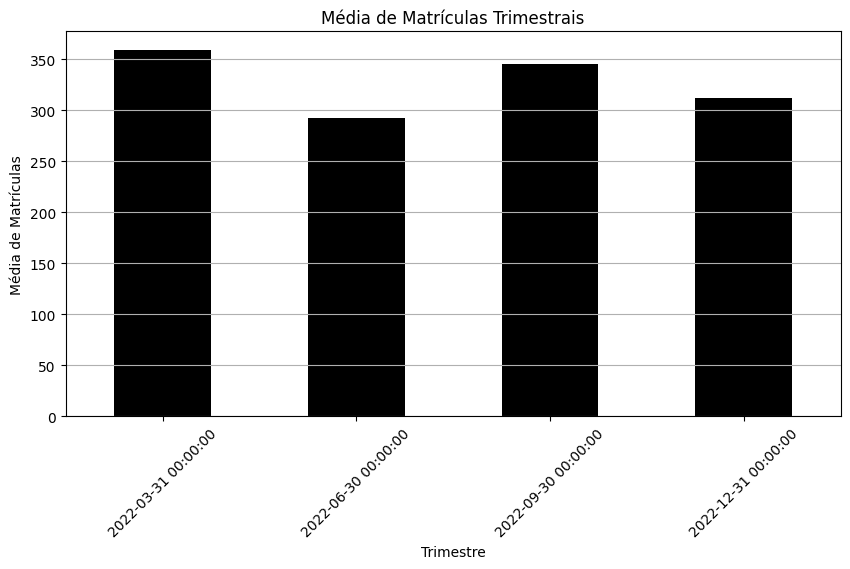

In [ ]:
plt.figure(figsize=(10,5))
media_trimestral.plot(kind='bar', color='black')
plt.title("Média de Matrículas Trimestrais")
plt.xlabel("Trimestre")
plt.ylabel("Média de Matrículas")
plt.grid(axis='y')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Desvio Padrão
# Passo 1. Calcula Media
# Passo 2. Calcula o desvio em relação a média

In [ ]:
# Desvio Padrao
# df['Matrículas'].std()

# Desvio Simples
df['Matrículas'] - df['Matrículas'].mean()

VARIÂNCIA

1. MEDIA
2. DESVIO SIMPLES

Passo 1. Valor do desvio elevado a 2
JAN = -70 ^2 = 4900
FEV = -65 ^2 = 4225
MAR = -55 ^2 = 3025
ABR = 190 ^2 = 36100

Passo 2. Media do desvio elevado
MEDIA = 12062.5

DESVIO PADRÂO
1. MEDIA
2. DESVIO SIMPLES
3. VARANCIA 

MEDIA = 12062.5

RAIZ QUADRADA DELE = 109.8

In [ ]:
# Calcular a variacao percentual mensal
# variacao = df['Matrículas'].pct_change()

# Calcular a variacao percentual mensal

variacao = df['Matrículas'].pct_change() * 100

In [ ]:
import seaborn as sn

tabela_variacao = pd.DataFrame({
    'Matricula': df['Matrículas'],
    'Variação Percentual %': variacao
})

def colorir_variacao(valor):
    if valor > 0:
        color = 'green'
    elif valor < 0:
        color = 'red'
    else:
        color = 'black'
    return f'color: {color}'

tabela_variacao.style.map(colorir_variacao, subset=['Variação Percentual %'])

,Matricula,Variação Percentual %
0,302,nan
1,470,55.629139
2,306,-34.893617
3,271,-11.437908
4,388,43.173432
5,220,-43.298969
6,302,37.272727
7,321,6.291391
8,414,28.971963
9,287,-30.676329
